# Regresión Lineal
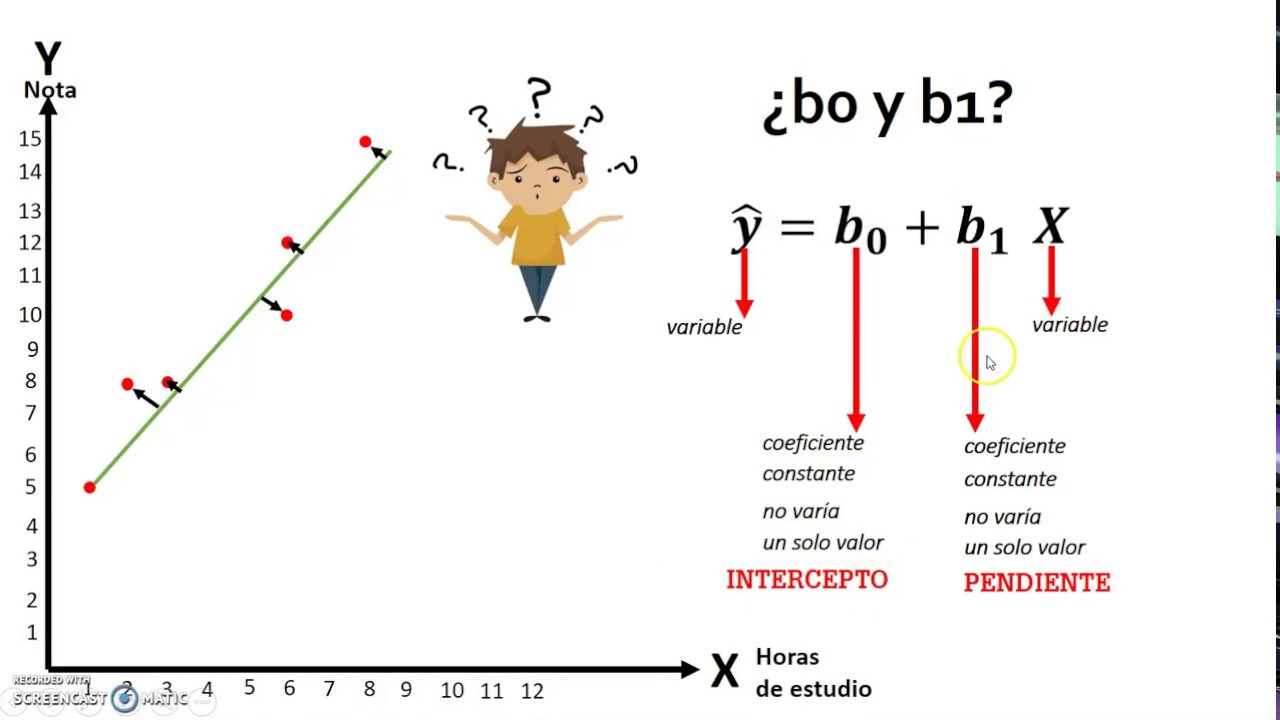

# **Ejemplo** 1 Regresion Lineal

## **Paso 1**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar para este ejercicio y vamos a configurar algunos valores <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes

Para realizar todos estos pasos podemos utilizar funciones que faciliten obtener un marco de datos nuevos cuando se lo necesite.
Despues de **cargar** el conjunto de datos aplicaremos los siguientes pasos de preprocesamiento: limpieza, codificación e imputación, luego vamos a dividir nuestros datos:


1.   **data_train** para entrenar el modelo
2.   **data_test** para hacer las predicciones 


In [3]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score

## **1. Cargar datos**

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/AUX_DS_ML_2_2023/main/datasets/cars_price.csv',encoding = "ISO-8859-1")

In [50]:
# Vamos visualizar los datos
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## **2. Limpiar datos**

In [51]:
# Vamos a crear un funcion para limpiar las cabeceras del dataset

def format_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ","_", regex=True)
    df.columns = df.columns.str.replace(".","_", regex=True)
    df.columns = df.columns.str.replace("-","_", regex=True)
    df.columns = df.columns.str.replace(":","_", regex=True)

In [52]:
format_column_names(data)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [54]:
data["present_year"]=2023
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023


In [55]:
data["age"] = data["present_year"] - data["year"]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,present_year,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2023,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2023,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2023,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2023,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2023,9


In [56]:
#data.drop(['year', 'present_year', 'name'], axis=1, inplace=True)
data.drop(['present_year'], axis=1, inplace=True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


## **3. Codificar datos**

In [57]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [58]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['year', 'selling_price', 'km_driven', 'age']

In [59]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

name: 1491 labels
fuel: 5 labels
seller_type: 3 labels
transmission: 2 labels
owner: 5 labels


In [60]:
# Ejemplo: obtener los diferentes valores de la columna Type
data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [61]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [62]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [63]:
col_cat_con(col_categorical,data)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,775,2007,60000,70000,4,1,1,0,16
1,1041,2007,135000,50000,4,1,1,0,16
2,505,2012,600000,100000,1,1,1,0,11
3,118,2017,250000,46000,4,1,1,0,6
4,279,2014,450000,141000,1,1,1,2,9


In [64]:
data.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
name,1.000000,-0.051902,-0.077598,0.126203,-0.083927,0.140802,0.087785,0.032819,0.051902
year,-0.051902,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705,-1.000000
selling_price,-0.077598,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,0.126203,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.083927,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,0.140802,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,0.087785,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,0.032819,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
age,0.051902,-1.000000,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


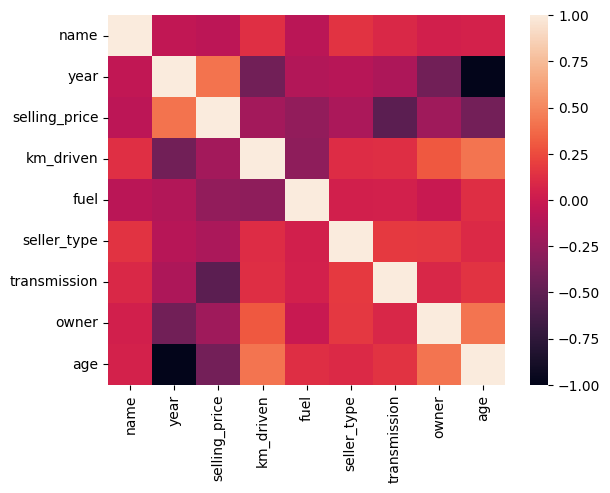

In [65]:
sns.heatmap(data.corr())
plt.show()

In [66]:
data.corr()['selling_price']

name            -0.077598
year             0.413922
selling_price    1.000000
km_driven       -0.192289
fuel            -0.269653
seller_type     -0.151554
transmission    -0.530205
owner           -0.207840
age             -0.413922
Name: selling_price, dtype: float64

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Paso 2**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




In [67]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,775,2007,60000,70000,4,1,1,0,16
1,1041,2007,135000,50000,4,1,1,0,16
2,505,2012,600000,100000,1,1,1,0,11
3,118,2017,250000,46000,4,1,1,0,6
4,279,2014,450000,141000,1,1,1,2,9


In [68]:
x = data.drop(['selling_price'], axis = 1)
y = data['selling_price']

In [39]:
x

,km_driven,fuel,seller_type,transmission,owner,age
0,70000,4,1,1,0,16
1,50000,4,1,1,0,16
2,100000,1,1,1,0,11
3,46000,4,1,1,0,6
4,141000,1,1,1,2,9
...,...,...,...,...,...,...
4335,80000,1,1,1,2,9
4336,80000,1,1,1,2,9
4337,83000,4,1,1,2,14
4338,90000,1,1,1,0,7


In [40]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 1)

## **Paso 4**
* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


In [71]:
regressor = LinearRegression()

In [72]:
model = regressor.fit(x_train,y_train)

In [73]:
y_pred = regressor.predict(x_test)

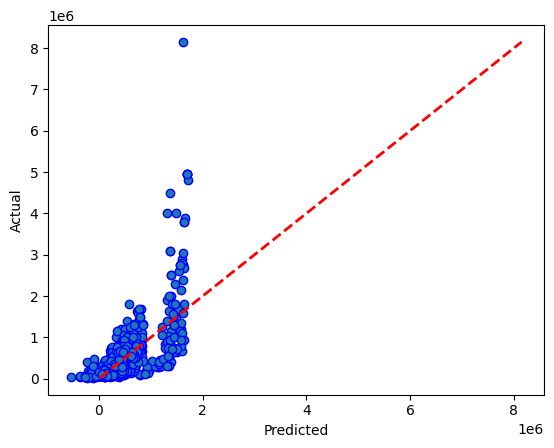

In [74]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual values')

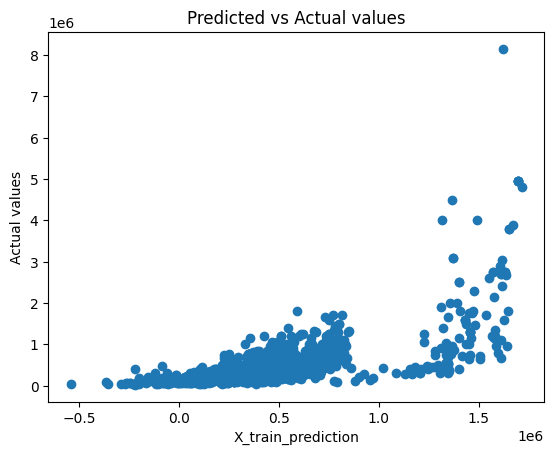

In [75]:
# visualize actual and predicted values on test data
plt.scatter(y_pred,y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

## **Paso 5**
* ### **Metricas de Regresion**


>1.   **Mean Absolute Error** <br>
El error absoluto medio (MAE) es una de las métricas más comunes que se utiliza para calcular el error de predicción del modelo.
MAE viene dado por la siguiente fórmula: <br>
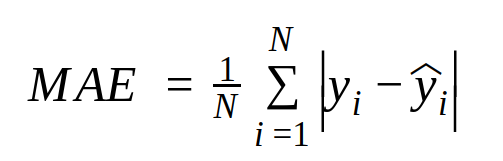
>2.   **Mean Squared Error**<br>
El error cuadrático medio (MSE) toma la diferencia cuadrática media entre el objetivo y los valores predichos. Este valor se usa ampliamente para muchos problemas de regresión y los errores más grandes tienen contribuciones cuadráticas correspondientemente más grandes al error medio. <br>
MSE viene dado por la siguiente fórmula:<br>
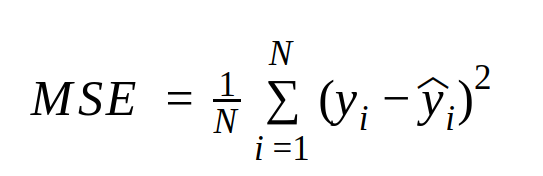
>3.   **R2 Score**<br>
La puntuación R^2 determina qué tan bien las predicciones de regresión se aproximan a los puntos de datos reales.<br>
El valor de R^2 se calcula con la siguiente fórmula:<br>
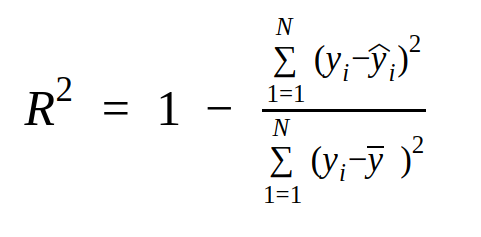


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 232979.46108301205
Mean Squared Error: 191220167302.10858
R2 Score: 0.45347583668096236


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2761,675000,839273.708605
3210,450000,554495.227945
2606,390000,506887.140902
1030,239000,432470.578332
3942,665000,612409.696752
...,...,...
730,550000,616040.774769
616,670000,416586.951982
1928,80000,161392.252462
1135,650000,461787.252394
